

# Project: Medical Appointment No Shows
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Hey There! I have selected Medical Appointment No Shows Dataset for this project. The reason for selcting this dataset was I want to work in healtcare sector &  would like to understand patient behaviour and found the reason behind why does a patient show up or do not show up for appointment.

The dataset variables are self explanatory and the orginal variables that exist here are 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'


## The Business questions I am trying to answer are:

1. Any Gender difference in having a patient to be with status Show / No-Show?

2. Any Age difference in having a patient to be with status Show / No- Show?

3. Any Age difference along with Gender difference with the status of Show / NoShow?

4. On which weekday/day/month maximum appointments are getting finalized with Show status?

5. Any specific medical condition that is driving the patient(Male/Female) to go to for the doctor appointment?

6. Are the digital /social media reminders helping the patients to take doctor's appointment?

7. Whether Scholarship from the government helping patients for good turnaround for physician visits?

8. Which neighbourhood regions are actually have higher appointments with physicians?

9. What factors are important for us to know in order to predict if a patient will show up for their sceduled time?

Below are the steps involved to understand, clean and prepare our data for data exploration or building a predictive model:

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

In [3]:
#Importing necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np          
import datetime             
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling


### Loading the data


In [18]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
# Creating Summary Report
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age is showing -ve (May be an outlier) and max value of age are ranging above 100


### Variable indentification


First we will identify the predictor and target variable

In [20]:
# We will check the columns
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

No-show is a target variable and all other variables are predictors

In [21]:
# Checking Data Types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Type of variable

#### Predictor variables

    Gender
    ScheduledDay
    AppointmentDay
    Age
    Neighbourhood
    Scholarship
    Hipertension
    Diabetes
    Alcoholism
    Handcap
    SMS_received

#### Target variable

    No-show

### Data Type

#### Character

Gender , ScheduledDay, AppointmentDay , Neighbourhood, No-show

#### Numeric

PatientId, AppointmentID, Age, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received

### Variable Category

#### Categorical

    'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
   'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'




In [22]:
#Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the above dataset

In [23]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for some sample counts

In [24]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [25]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [26]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [27]:
#Check for scheduled day and appointment day  
df[['ScheduledDay','AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [28]:
# # Converting the dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [29]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [30]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [31]:
df['Month_appointed'].nunique()

3

In [32]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [33]:
# find the unique values for each of the columns specified
print("Unique values for 'Gender' : {}".format(df.Gender.unique()))
print("Unique values for 'Age' : {}".format(sorted(df.Age.unique())))
print("Unique values for 'Neighbourhood' : {}".format(df.Neighbourhood.unique()))
print("Unique values for 'Scholarship' : {}".format(df.Scholarship.unique()))
print("Unique values for 'Hypertension' : {}".format(df.Hypertension.unique()))
print("the unique values for 'Diabetes' : {}".format(df.Diabetes.unique()))
print("Unique values for 'Alcoholism' : {}".format(df.Alcoholism.unique()))

print("Unique values for 'Handicap' : {}".format(df.Handicap.unique()))
print("Unique values for 'SMS_received' : {}".format(df.SMS_received.unique()))
print("Unique values for 'NoShow' : {}".format(df.NoShow.unique()))

Unique values for 'Gender' : ['F' 'M']
Unique values for 'Age' : [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Unique values for 'Neighbourhood' : ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO

Age has values with -1 (Which is unrealistic) and > 100 (There might be few patients with > 100 , but we can consider these patients as outliers)

In [34]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

8 Records have Age < 0 and Age > 100. Hence consider these patients as outliers and remove them

In [35]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [37]:
#Uniuqe patient counts in the dataset
df.PatientId.nunique()

62294


### Univariate Analysis

We will first look at the target variable, i.e., NoShow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.


In [38]:
df['NoShow'].value_counts()

No     88203
Yes    22316
Name: NoShow, dtype: int64

In [39]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64





Here there is no class imbalance problem . Hence we can proceed further without addressing any class imbalance issues

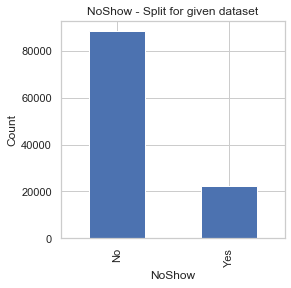

In [40]:
df['NoShow'].value_counts().plot.bar(figsize = (4,4), title = 'NoShow - Split for given dataset', color = 'b')
plt.xlabel('NoShow')
plt.ylabel('Count');

The patient records or instances which DO NOT show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168(around 80%) out of total 110,480.

Now lets visualize each variable separately. Different types of variables are Categorical and numerical.

•Categorical features: These features have categories ('Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show' )

•Numerical features: These features have numerical values (Age, Day_Scheduled and Day_appointed)

There are date columns as well, I have placed them in numeric bucket.

#### Let’s visualize the categorical and ordinal features first.

<Figure size 432x288 with 0 Axes>

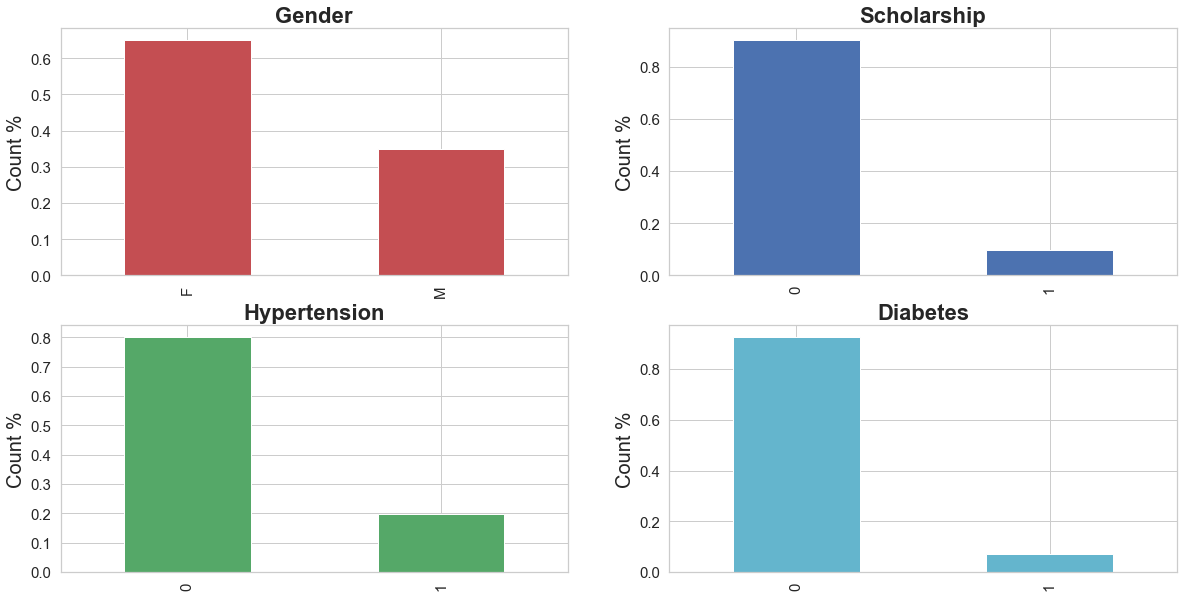

In [42]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes']
#              , 'Alcoholism', 'Handicap']
colour = ['r', 'b', 'g', 'c']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,10), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1

It can be inferred from the above bar plots that:

   1. Around 65% patient instances are with female records
   2. Around 85% of the these instances are not having scholarship.
   3. Around 20% of patient instances have Hypertension.
   4. Around 88% of patient instacnes do not have diabetes

<Figure size 432x288 with 0 Axes>

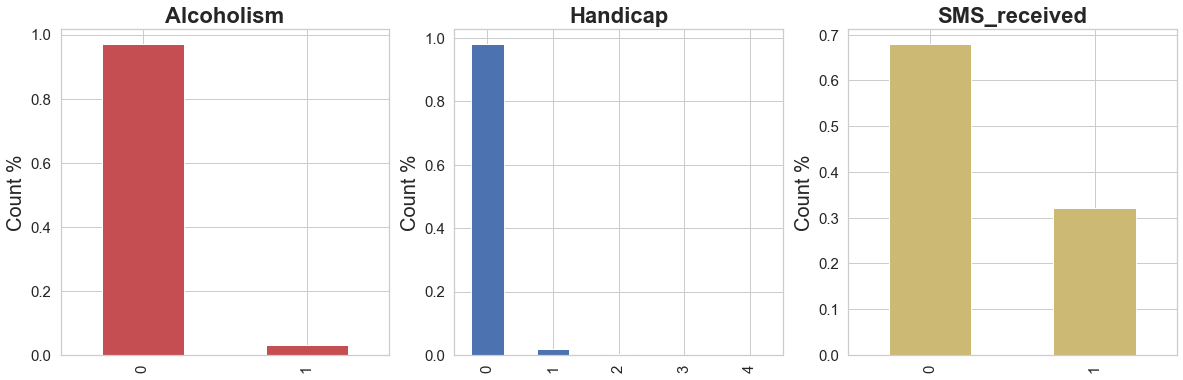

In [43]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Alcoholism', 'Handicap', 'SMS_received']

colour = ['r', 'b', 'y']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(13)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,6), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1

It can be inferred from the above bar plots that:

   1. Around 98% patient instances are alcoholics.
   2. Around 99% of the patient instances are with Handicap status = 0
   3. Around 70% of the patient instances have received SMS regarding the appointment /scheduled time.

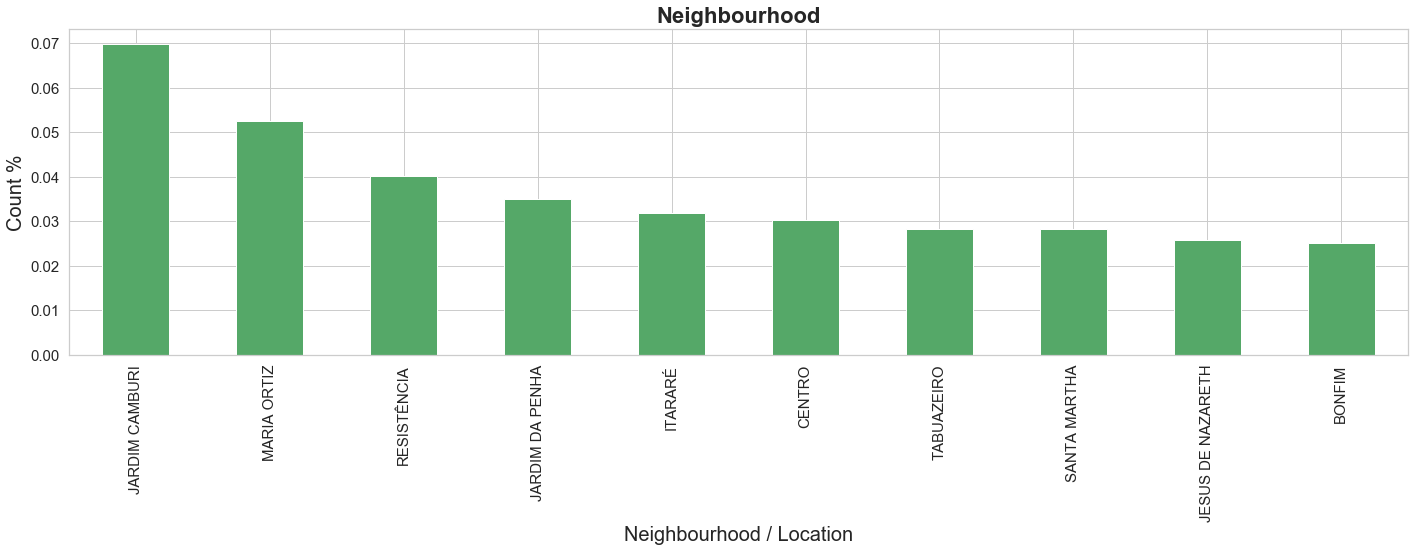

In [44]:
# Plot the neighbourhood values
df['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'g')
plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 20.0)
plt.show()

JARDIM CAMBURI location has majority of the patient instances , followed by MARIA ORTIZ


#### Let's visualize the Numerical Attributes

(Age, Day_Scheduled and Day_appointed)


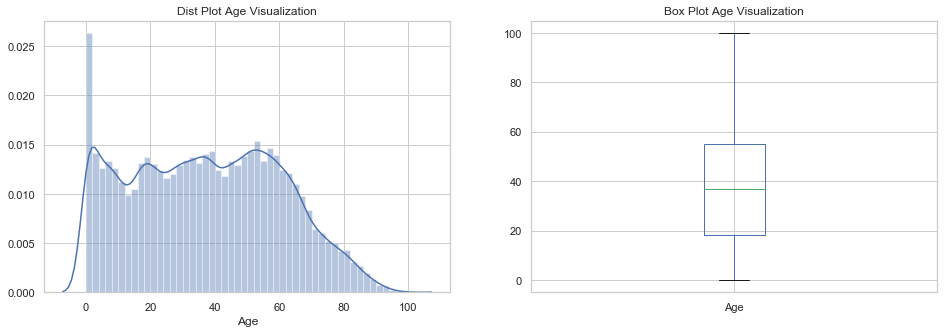

In [47]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Age'])
plt.title('Dist Plot Age Visualization')

plt.subplot(122)
df['Age'].plot.box(figsize=(16,5))
plt.title('Box Plot Age Visualization')
plt.show()

Majority of the patients are of age group ranging from 0 to 60.

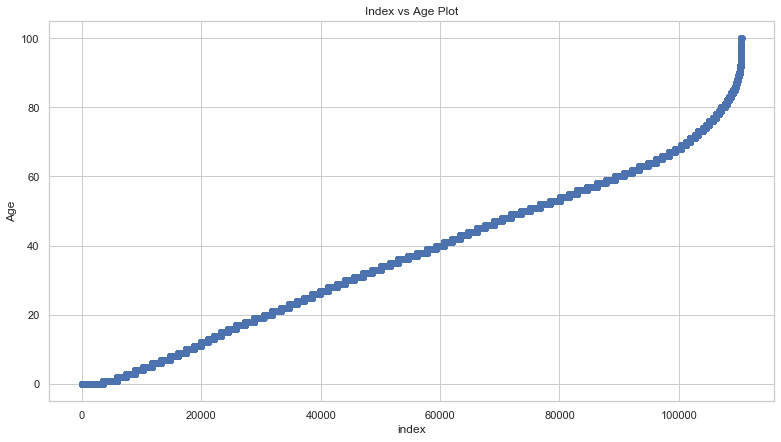

In [51]:
plt.figure(figsize=(13,7))
plt.scatter(range(df.shape[0]), np.sort(df.Age.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Index vs Age Plot')
plt.show()

From the above age graph there are no outliers 

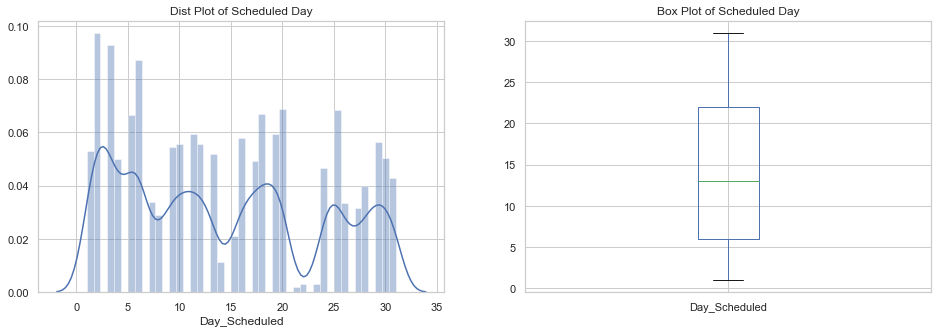

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['Day_Scheduled'])
plt.title('Dist Plot of Scheduled Day')


plt.subplot(122)
df['Day_Scheduled'].plot.box(figsize=(16,5))
plt.title('Box Plot of Scheduled Day')

plt.show()

From the graph, maximum scheduled days is between 0 t0 5.

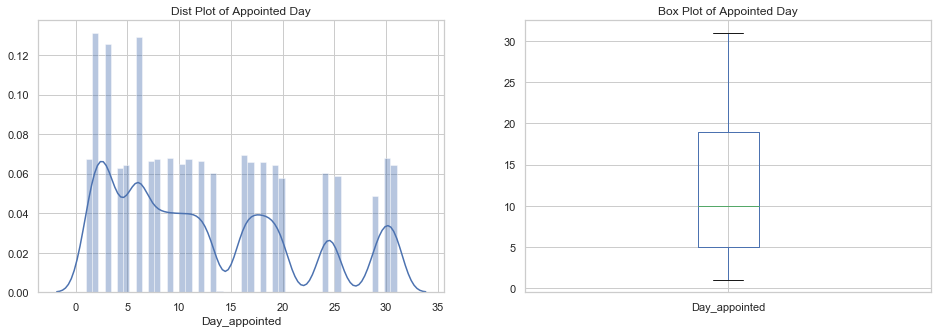

In [88]:
plt.figure(1)
plt.subplot(121)
plt.title('Dist Plot of Appointed Day')
sns.distplot(df['Day_appointed'])


plt.subplot(122)
df['Day_appointed'].plot.box(figsize=(16,5))
plt.title('Box Plot of Appointed Day')

plt.show()

From the graph, maximum appointed days is also between 0 to 5.


### Bi-variate Analysis

#### Categorical Independent Variable vs Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of instances who are with NoShow split


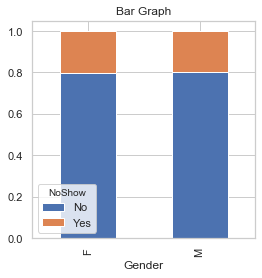

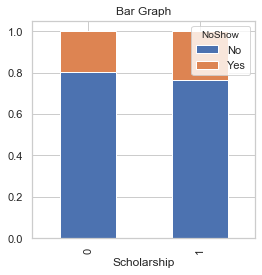

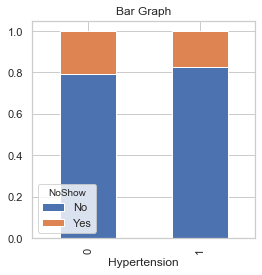

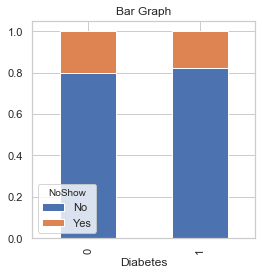

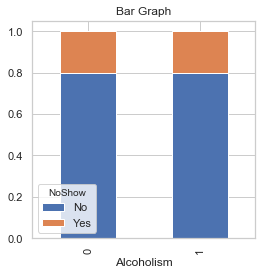

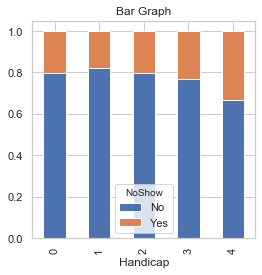

In [87]:
cat_list = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in cat_list:
    col1 =pd.crosstab(df[col],df['NoShow'])
    col1.div(col1.sum(1).astype(float), axis=0).plot(kind="bar",  stacked=True, figsize=(4,4),title='Bar Graph');

The inferences that can be made from here are:

   1. Not much of difference in Female/Male groups with "NoShow" status
   2. Instances who have scholarship have slightly more "NoShow" status
   3. Hypertension & Diabetes instances have more "NoShow" status
   4. Not much of difference in Alcoholism/Non-Alcoholism groups with "NoShow" status
   5. Handicap with category 4 have more "NoShow" status




#### Bi-variate Analysis on Numeric variables vs Target variable

Text(0.5, 1.0, 'Bar Plot Mean_Age vs NoShow')

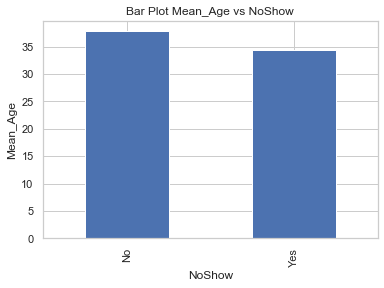

In [85]:
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');
plt.title('Bar Plot Mean_Age vs NoShow')

The mean age group of instances with "NoShow" have lesser age 


### Missing values treatment & Outlier treatment


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
PatientId            110519 non-null float64
AppointmentID        110519 non-null int64
Gender               110519 non-null object
ScheduledDay         110519 non-null datetime64[ns]
AppointmentDay       110519 non-null datetime64[ns]
Age                  110519 non-null int64
Neighbourhood        110519 non-null object
Scholarship          110519 non-null int64
Hypertension         110519 non-null int64
Diabetes             110519 non-null int64
Alcoholism           110519 non-null int64
Handicap             110519 non-null int64
SMS_received         110519 non-null int64
NoShow               110519 non-null object
Day_Scheduled        110519 non-null int64
weekday_Scheduled    110519 non-null int64
Month_Scheduled      110519 non-null int64
Day_appointed        110519 non-null int64
weekday_appointed    110519 non-null int64
Month_appointed      110519 non-null int64
dtypes

In [58]:
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

There are no missing values and it seems there are no outliers from the univariate analysis done earlier (There were some patients with Age < 0 and Age > 100 , I have removed them from the data )


### Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. You are not adding any new data here, but you are actually making the data you already have more useful.

Feature engineering itself can be divided in 2 steps:

    Variable transformation.
    Variable / Feature creation.

##### Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation. In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Here in this case study , I do not see any transformations are required for the variables listed for this dataset

##### Variable creation

Yes the AppointmentTime and ScheduledTime are converted into day of month with names Day_Scheduled and Day_appointed

   ##### Let us drop unnecessary columns



In [59]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')


##### The columns mentioned below are unnecessary as they don't add any prediction value, hence we can drop them

'PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'


In [60]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [61]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [62]:
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5], dtype=int64)

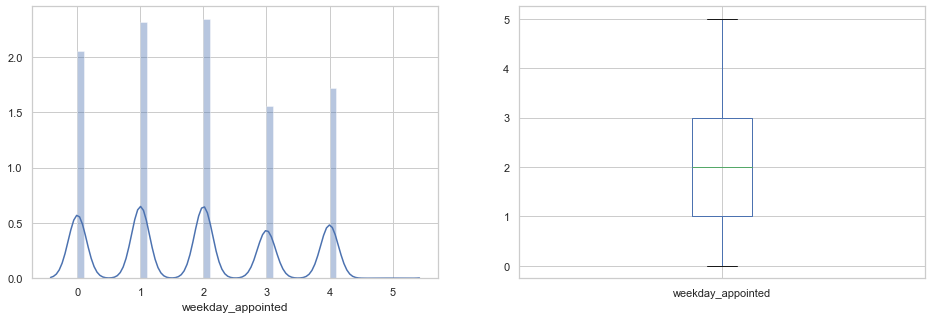

In [63]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
sns.distplot(df['weekday_appointed'])

plt.subplot(122)
df['weekday_appointed'].plot.box(figsize=(16,5))
plt.show()

Tuesday and Wednesday have maximum number of appointments

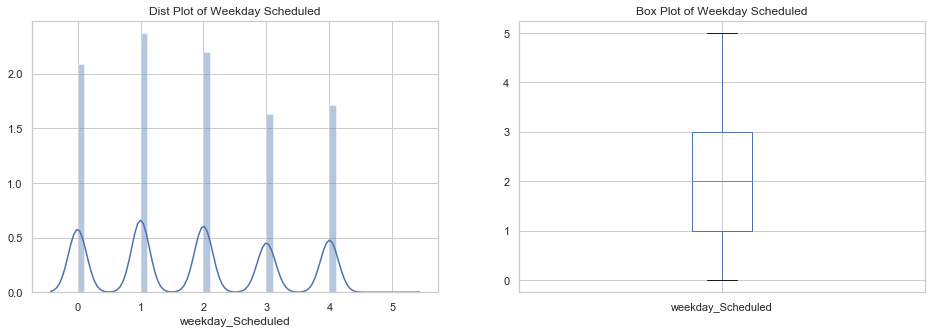

In [84]:
# The day of the week with Monday=0, Sunday=6
plt.figure(1)
plt.subplot(121)
plt.title('Dist Plot of Weekday Scheduled')
sns.distplot(df['weekday_Scheduled'])


plt.subplot(122)
plt.title('Box Plot of Weekday Scheduled')
df['weekday_Scheduled'].plot.box(figsize=(16,5))

plt.show()

Now the data set is almost cleaned with all the pre-processing steps. Now we can do an Exploratory Data Analysis

<a id='eda'></a>
# Exploratory Data Analysis

#### Now I will be answering all the questions mentioned above with my analysis



### 1. Any Gender difference in having a patient to be with status Show / No-Show? 

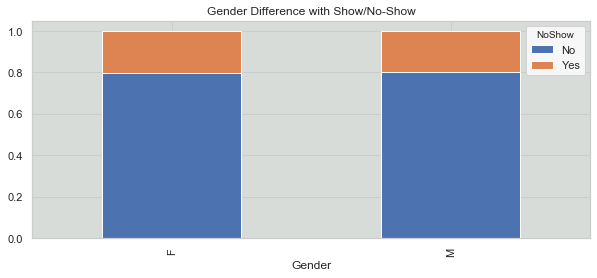

In [82]:
fig, ax = plt.subplots()
Gender=pd.crosstab(df['Gender'],df['NoShow'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4),  ax = ax,title='Gender Difference with Show/No-Show');
ax.set_facecolor('#d8dcd9')

Not much of difference with gender in having the status with Show/NoShow

### 2. Any Age difference in having a patient to be with status Show / No- Show?

Text(0.5, 1.0, 'Age Difference With Show/No-Show')

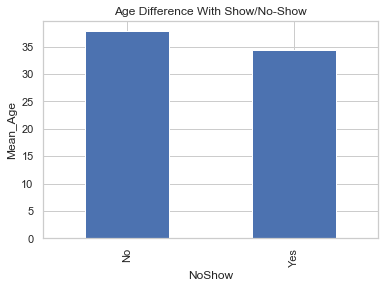

In [83]:
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar()
plt.ylabel('Mean_Age');
plt.title('Age Difference With Show/No-Show')

The mean age group of instances with "NoShow = Yes" have lesser age

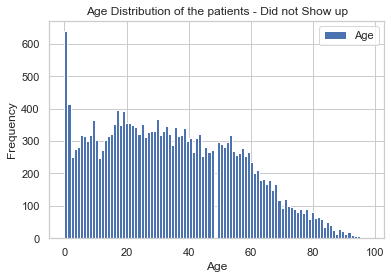

In [67]:
# Age Distribution
# Get the distribution for only NoShow = 1 / Yes
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus


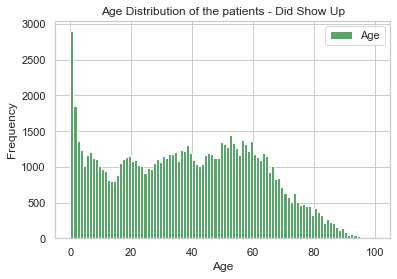

In [68]:
df_Show = df[df['NoShow'] == "No"]
df_Show.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients - Did Show Up')
plt.xlabel('Age')
plt.show()

Of the patients who have showed up for appointment, it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 plus.

### 3. Any Age difference along with Gender difference with the status of Show / NoShow?

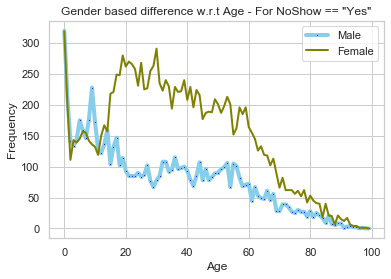

In [69]:
# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

Female patients with Age group from 20 to 40 are NOT active in getting appointment with doctors when compared to similar age group of Males

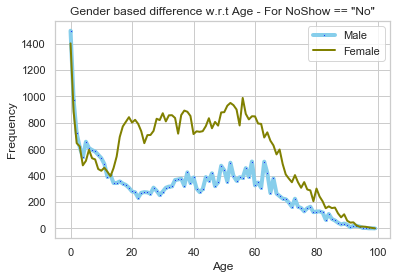

In [70]:
# Analysing the distribution among genders with their age whose status for NoShow is "No"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'No')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'No')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "No"');

Female patients with Age group from 40 to 60 are active in getting appointment with doctors when compared to similar age group of Males


### 4. On which weekday/day/month maximum appointments are getting finalized with Show status?

In [71]:

df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

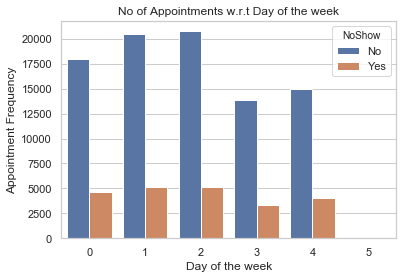

In [72]:
app_weekday = sns.countplot(x = 'weekday_appointed', hue = 'NoShow', data = df)
app_weekday.set_title('No of Appointments w.r.t Day of the week')
plt.xlabel('Day of the week')
plt.ylabel('Appointment Frequency')
plt.show()
#The day of the week with Monday=0, Sunday=6

Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends

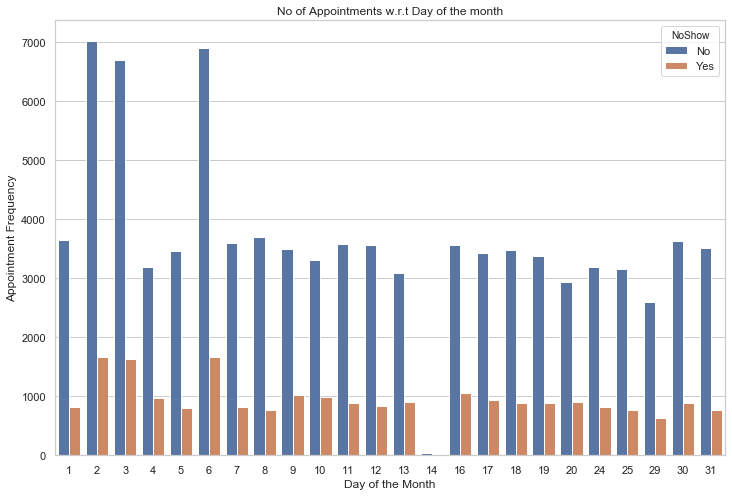

In [73]:
plt.figure(figsize = (12,8))
app_day = sns.countplot(x = 'Day_appointed', hue = 'NoShow', data = df)
app_day.set_title('No of Appointments w.r.t Day of the month')
plt.xlabel('Day of the Month')
plt.ylabel('Appointment Frequency')
plt.show()

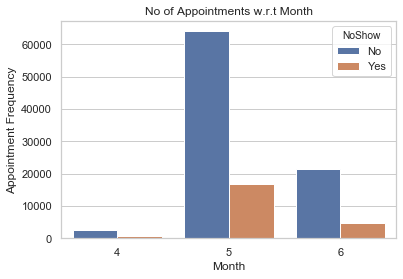

In [74]:
# plt.figure(figsize = (12,8))
app_month = sns.countplot(x = 'Month_appointed', hue = 'NoShow', data = df)
app_month.set_title('No of Appointments w.r.t Month')
plt.xlabel('Month')
plt.ylabel('Appointment Frequency')
plt.show()



  Majority of the appointments happend in the month of May



### 5. Any specific medical condition that is driving the patient(Male/Female) to go for the doctor appointment?

<Figure size 432x288 with 0 Axes>

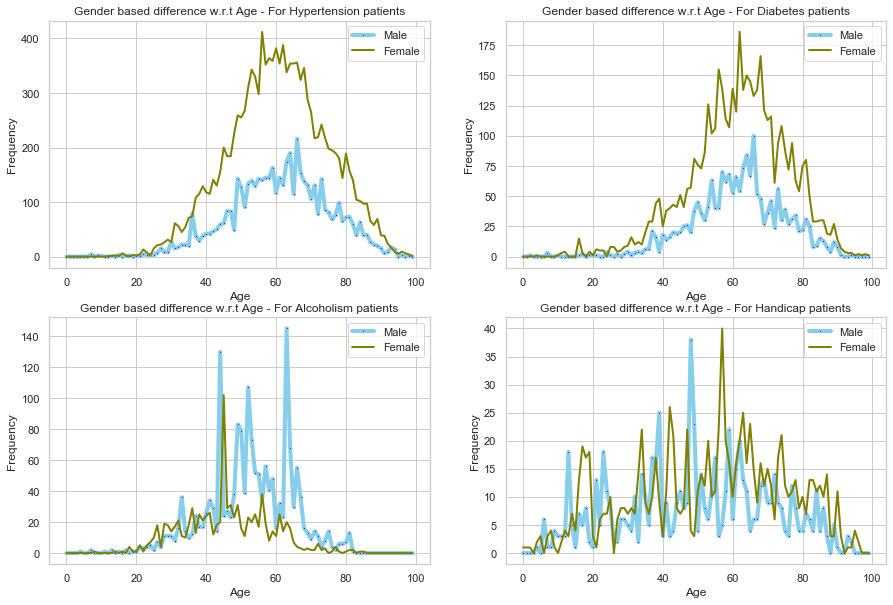

In [75]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']
for col in iter_cols: 
    plt.subplot(int(str(22)+str((iter_cols.index(col)+1))))
    range_df = pd.DataFrame()
    range_df['Age'] = range(100) # Setting up for the age limit of 100 only
    Male_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df[col] == 1) & (df.NoShow == 'No') ]))
    Female_Hyper = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df[col] == 1)& (df.NoShow == 'No')]))

    # multiple line plot
    plt.plot( range_df, Male_Hyper, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
    plt.plot( range_df, Female_Hyper, marker='', color='olive', linewidth=2)

    plt.legend(['Male','Female'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    # plt.figsize=(20,10)
    plt.title('Gender based difference w.r.t Age - For {} patients'.format(col));


#### Inferences from the above charts are:

   1. Hypertension and Diabetes patients are attending the doctor with NoShow status = "No" are from the similar age ranges          from 40 to 80 - with females conversion better than Males.
    
   2. Alcoholism patients from Male group visits are more compared to female and they are in range from 45 to 65.
    
   3. Male and Female visits for Handicap patient are in the similar range (There is not much of difference).



### 6. Are the digital /social media reminders are helping the patients to take doctor's appointment?

#### SMS_received

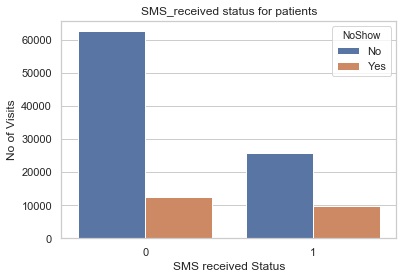

In [76]:
SMS_recieved = sns.countplot(x = 'SMS_received', hue = 'NoShow', data = df)
SMS_recieved.set_title('SMS_received status for patients')
plt.xlabel('SMS received Status')
plt.ylabel('No of Visits')
plt.show()

It can be inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit 

### 7. Whether Scholarship from the government helping patients for good turnaround for physician visits?

#### Scholarship

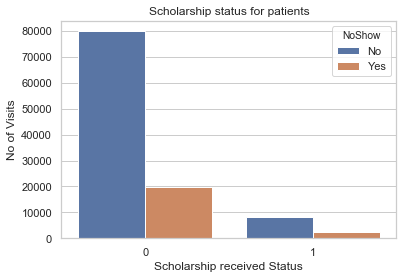

In [77]:
Scholarship = sns.countplot(x = 'Scholarship', hue = 'NoShow', data = df)
Scholarship.set_title('Scholarship status for patients')
plt.xlabel('Scholarship received Status')
plt.ylabel('No of Visits')
plt.show()

We would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend

### 8. Which neighbourhood regions are actually have higher appointments with physicians?

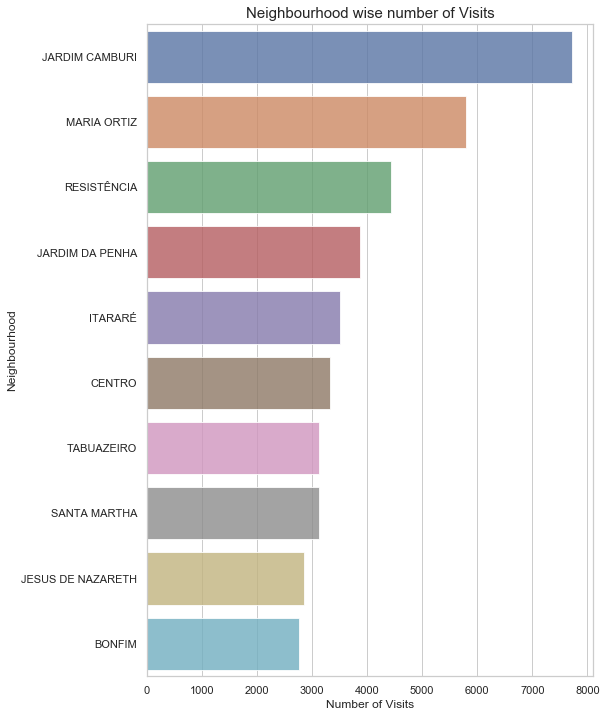

In [78]:
# Top 10 Neighbourhood values based on the Visits
cnt_srs = df['Neighbourhood'].value_counts().head(10)
plt.figure(figsize=(8,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Visits', fontsize=12)
plt.ylabel('Neighbourhood', fontsize=12)
plt.title("Neighbourhood wise number of Visits", fontsize=15)
plt.show()

In [79]:
temp_series = df['Neighbourhood'].value_counts().head(20)

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Neighbourhood - No of Visits'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="Neighbourhood")

The number of visits are more from the area - Jardim Camburi

### Limitations

   1. If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the
       patients are coming from Jardim Camburi.
    
   2. The data contained only April, May and June data - If there are complete full year data on monthly basis, we can    
       actually identify the traffic months for physicians appointments
    
   3. If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are 
       required for a patient to get active for appointment.
    
   4. If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are 
       having more visits compared to other age groups.



<a id='conclusions'></a>
## Conclusions

Here is my conclusion based on my observation:

1. Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus. of these 20 to 40 age group, Female patients are NOT active in getting appointment with doctors when compared to similar age group of Males

2. Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. Hence weekdays are the best for good conversion for appointment

3. Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males.

4. Alcoholism patients from Male group have showed up for physician visit when compared to female and they are in range from 45 to 65.

5. If there are any promotions towards digital media either through SMS / emails, the conversion for physician visit will improve and from the data it is inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit.

6. On contrary actually we would expect that patients who have got scholarship should have been all attended the physician but it seems that ~25% of patients did not attend.

7. Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations.

In [80]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0


### References

   1. [https://python-graph-gallery.com/122-multiple-lines-chart/]

   2. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/

   3. [Kaggle Kernels] https://www.kaggle.com/sudalairajkumar/an-interactive-deep-dive-into-survey-results
   
   4. https://www.analyticsvidhya.com/blog/author/sunil-ray/
    
